In [48]:
# 종강

import warnings 

warnings.filterwarnings(action='ignore')

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [50]:
plt.rc('font', family='Malgun Gothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [51]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [52]:
covid_data=pd.read_csv('data/Covid_case.csv')
covid_data.head()

,Unnamed: 0,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt,Unnamed: 15
0,0,2.255638,14285339.0,13229116.0,29546.0,266414.0,2021-09-25 10:49:15.225,2441.0,298401,1056223.0,12930715.0,646.0,20210925,00:00,2021-09-26 10:29:10.433,3269
1,1,2.237343,14221685.0,13191185.0,28206.0,264492.0,2021-09-24 09:53:29.116,2434.0,295132,1030500.0,12896053.0,645.0,20210924,00:00,NaN,2433
2,2,2.231558,14151069.0,13116349.0,27430.0,262842.0,2021-09-23 10:01:14.491,2427.0,292699,1034720.0,12823650.0,644.0,20210923,00:00,NaN,1716
3,3,2.218799,14112435.0,13114439.0,26752.0,261812.0,2021-09-22 09:35:53.93,2419.0,290983,997996.0,12823456.0,643.0,20210922,00:00,NaN,1720
4,4,2.205520,14081284.0,13115409.0,26760.0,260090.0,2021-09-21 09:39:49.437,2413.0,289263,965875.0,12826146.0,642.0,20210921,00:00,NaN,1729


In [53]:
covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2021-09-25,NaN,298401,2441.0,2021,9
2021-09-24,3269.0,295132,2434.0,2021,9
2021-09-23,2433.0,292699,2427.0,2021,9
2021-09-22,1716.0,290983,2419.0,2021,9
2021-09-21,1720.0,289263,2413.0,2021,9


In [54]:
covid_data_new.describe().daily_decideCnt

count     603.000000
mean      494.860697
std       552.512534
min         0.000000
25%        61.500000
50%       363.000000
75%       645.500000
max      3269.000000
Name: daily_decideCnt, dtype: float64

In [62]:
covid_data_2018_summer=covid_data_new[(covid_data_new.year==2018) & ((covid_data_new.month==7)|(covid_data_new.month==8))]
covid_data_2019_summer=covid_data_new[(covid_data_new.year==2019) & ((covid_data_new.month==7)|(covid_data_new.month==8))]
covid_data_2020_summer=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==7)|(covid_data_new.month==8))]


In [63]:
traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])

traffic_data.index=pd.to_datetime(traffic_data['집계일자'],format='%Y%m%d')
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]

traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')
traffic_data=traffic_data.replace('북강릉영업소','북강릉')
traffic_data=traffic_data.replace('남강릉영업소','남강릉')
traffic_data=traffic_data.replace('강릉영업소','강릉')

traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275
2018-01-01,가락,615,14,5,14,96,26,770
2018-01-01,가락(개),2358,31,48,57,131,273,2898
2018-01-01,가락(개),7148,27,71,27,267,378,7918
2018-01-01,가락(개),2946,29,52,48,150,357,3582


In [64]:
traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,
2018-01-01,5562671,64729,140284,36796,34705,240045,6079230
2018-01-02,4945308,200328,257620,163881,234282,290196,6091615
2018-01-03,4841053,232174,293244,212214,294425,289377,6162487
2018-01-04,4902656,232305,293413,209227,300632,291083,6229316
2018-01-05,5342859,233726,299322,209493,299666,310678,6695744


In [65]:
data_mart_total=covid_data_new.join(traffic_data_total, how='right')
data_mart_total['date']=data_mart_total.index
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
data_mart_total['day_of_week']=data_mart_total.index.dayofweek
data_mart_total.day_of_week=data_mart_total.day_of_week.apply(lambda x : days[x])
data_mart_total.decideCnt=data_mart_total.decideCnt.fillna(0)
data_mart_total.daily_decideCnt=data_mart_total.daily_decideCnt.fillna(0)
data_mart_total.deathCnt=data_mart_total.deathCnt.fillna(0)
data_mart_total['year']=data_mart_total.index.year
data_mart_total['month']=data_mart_total.index.month
data_mart_total['categorize_100']=data_mart_total.daily_decideCnt//100
data_mart_total

,daily_decideCnt,decideCnt,deathCnt,year,month,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,date,day_of_week,categorize_100
집계일자,,,,,,,,,,,,,,,
2018-01-01,0.0,0.0,0.0,2018,1,5562671,64729,140284,36796,34705,240045,6079230,2018-01-01,MON,0.0
2018-01-02,0.0,0.0,0.0,2018,1,4945308,200328,257620,163881,234282,290196,6091615,2018-01-02,TUE,0.0
2018-01-03,0.0,0.0,0.0,2018,1,4841053,232174,293244,212214,294425,289377,6162487,2018-01-03,WED,0.0
2018-01-04,0.0,0.0,0.0,2018,1,4902656,232305,293413,209227,300632,291083,6229316,2018-01-04,THU,0.0
2018-01-05,0.0,0.0,0.0,2018,1,5342859,233726,299322,209493,299666,310678,6695744,2018-01-05,FRI,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,614.0,154456.0,2012.0,2021,6,6655649,120116,157780,116659,200051,281180,7531435,2021-06-26,SAT,6.0
2021-06-27,501.0,155070.0,2013.0,2021,6,6259574,56712,102220,52385,56189,250514,6777594,2021-06-27,SUN,5.0
2021-06-28,595.0,155571.0,2015.0,2021,6,5983959,226402,269051,233856,353371,310826,7377465,2021-06-28,MON,5.0


<AxesSubplot:title={'center':'Daily Trend Of COVID-19 Confirmed Cases'}, xlabel='stateDt', ylabel='daily_decideCnt'>

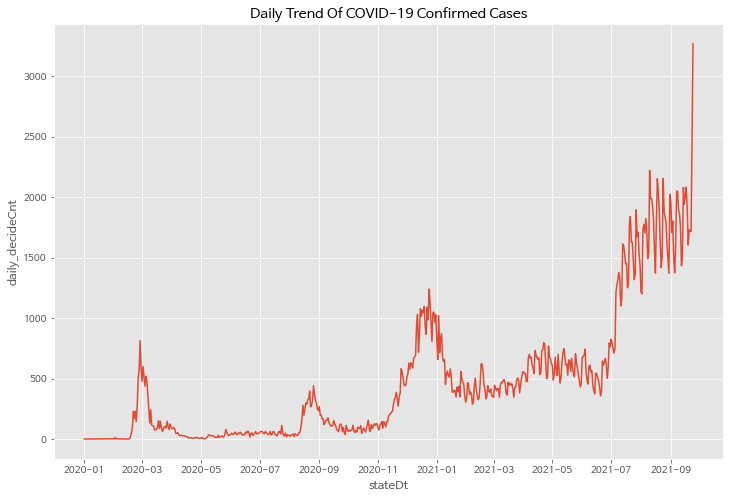

In [66]:
plt.figure(figsize=(12,8))
plt.title('Daily Trend Of COVID-19 Confirmed Cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='daily_decideCnt')

<AxesSubplot:xlabel='집계일자', ylabel='총교통량'>

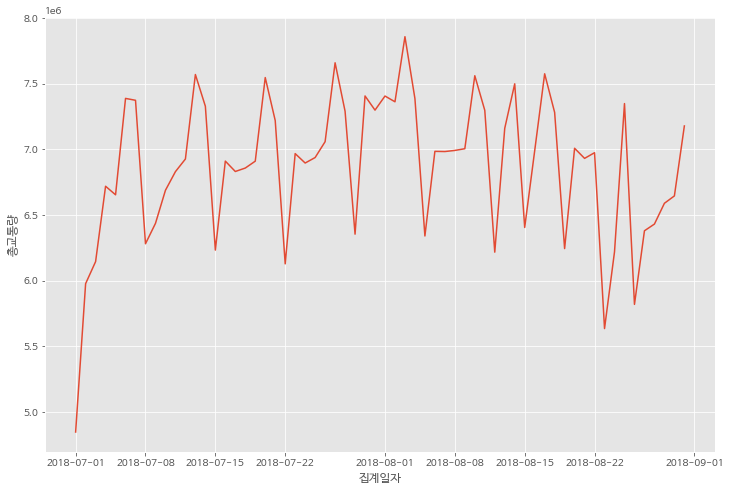

In [42]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_mart_total[((data_mart_total.day_of_week=='MON')
                                    |(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))
                                    &((data_mart_total.year==2018)&((data_mart_total.month==7)|(data_mart_total.month==8)))], x='집계일자', y='총교통량')


<AxesSubplot:xlabel='stateDt', ylabel='daily_decideCnt'>

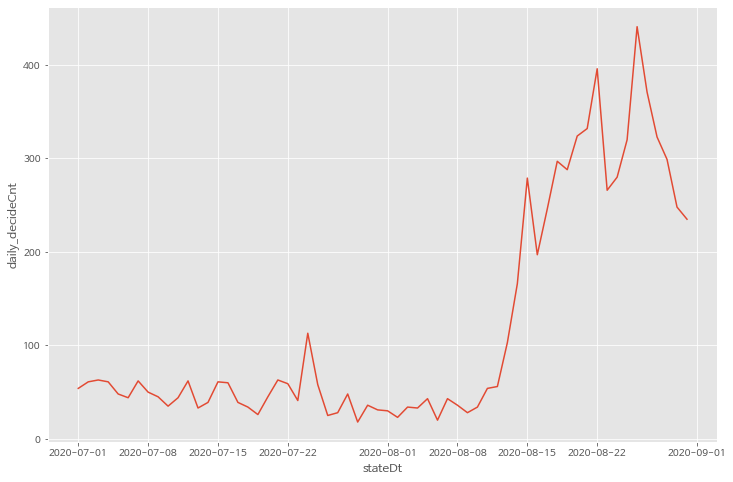

<AxesSubplot:xlabel='집계일자', ylabel='총교통량'>

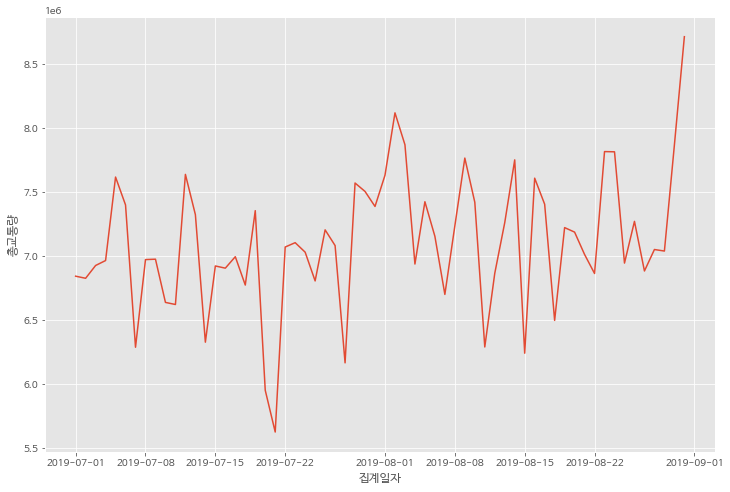

In [43]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_mart_total[((data_mart_total.day_of_week=='MON')
                                    |(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))
                                    &((data_mart_total.year==2019)&((data_mart_total.month==7)|(data_mart_total.month==8)))], x='집계일자', y='총교통량')


<AxesSubplot:xlabel='집계일자', ylabel='총교통량'>

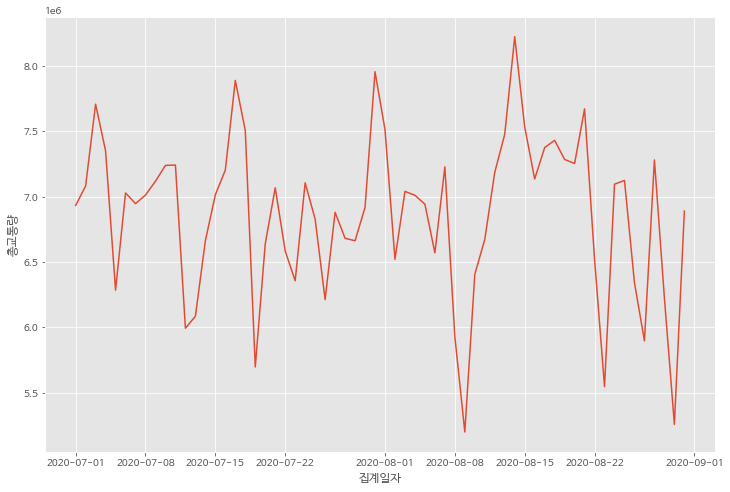

In [44]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_mart_total[((data_mart_total.day_of_week=='MON')
                                    |(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))
                                    &((data_mart_total.year==2020)&((data_mart_total.month==7)|(data_mart_total.month==8)))], x='집계일자', y='총교통량')


<AxesSubplot:xlabel='stateDt', ylabel='daily_decideCnt'>

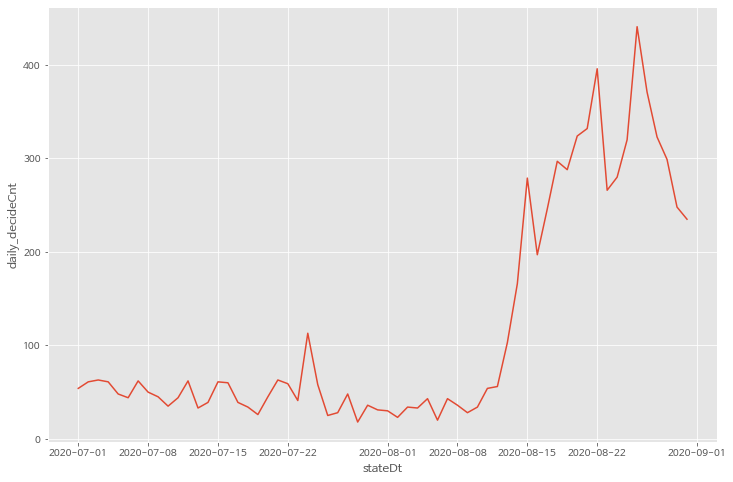

In [70]:
plt.figure(figsize=(12,8))

sns.lineplot(data=covid_data_2020_summer, x='stateDt', y='daily_decideCnt')

<AxesSubplot:xlabel='집계일자', ylabel='1종교통량'>

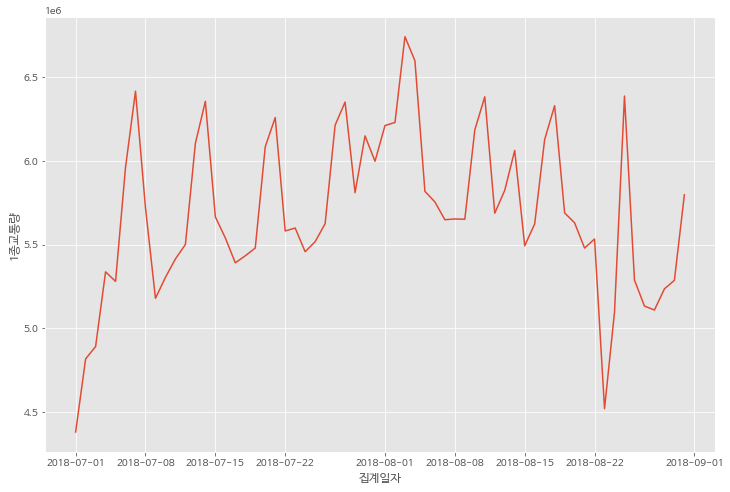

In [45]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_mart_total[((data_mart_total.day_of_week=='MON')
                                    |(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))
                                    &((data_mart_total.year==2018)&((data_mart_total.month==7)|(data_mart_total.month==8)))], x='집계일자', y='1종교통량')


<AxesSubplot:xlabel='집계일자', ylabel='1종교통량'>

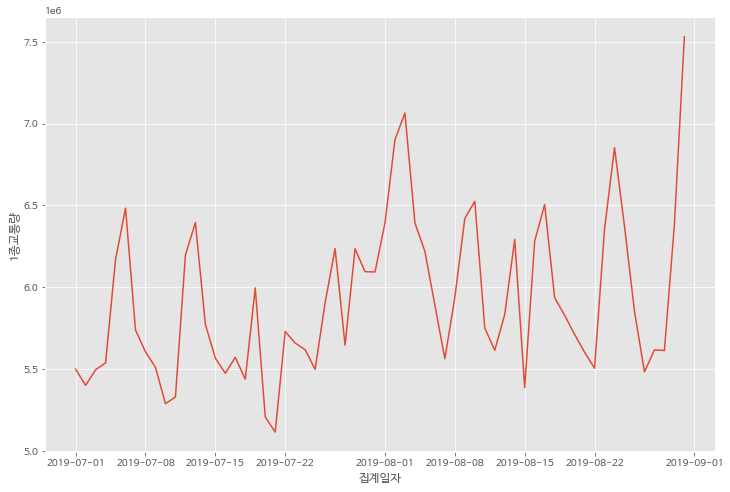

In [46]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_mart_total[((data_mart_total.day_of_week=='MON')
                                    |(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))
                                    &((data_mart_total.year==2019)&((data_mart_total.month==7)|(data_mart_total.month==8)))], x='집계일자', y='1종교통량')

<AxesSubplot:xlabel='집계일자', ylabel='1종교통량'>

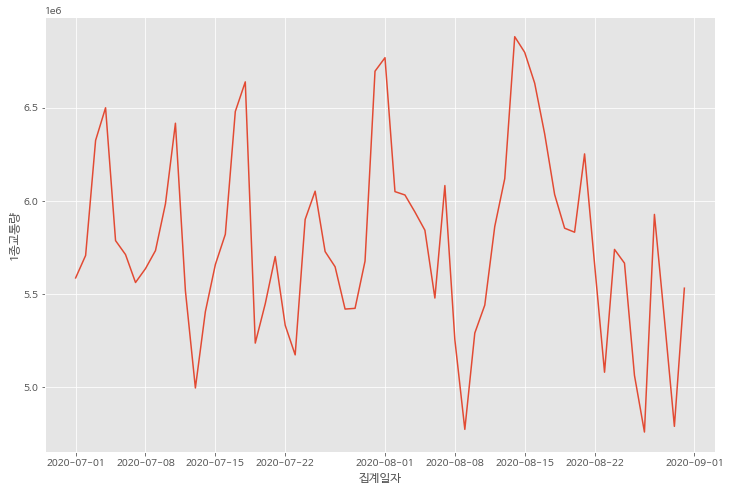

In [47]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_mart_total[((data_mart_total.day_of_week=='MON')
                                    |(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))
                                    &((data_mart_total.year==2020)&((data_mart_total.month==7)|(data_mart_total.month==8)))], x='집계일자', y='1종교통량')

<AxesSubplot:xlabel='stateDt', ylabel='daily_decideCnt'>

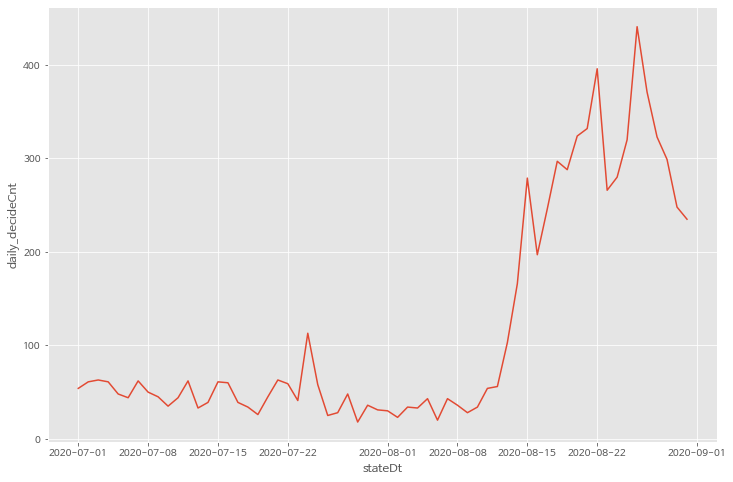

In [71]:
plt.figure(figsize=(12,8))

sns.lineplot(data=covid_data_2020_summer, x='stateDt', y='daily_decideCnt')

<AxesSubplot:xlabel='집계일자', ylabel='2종교통량'>

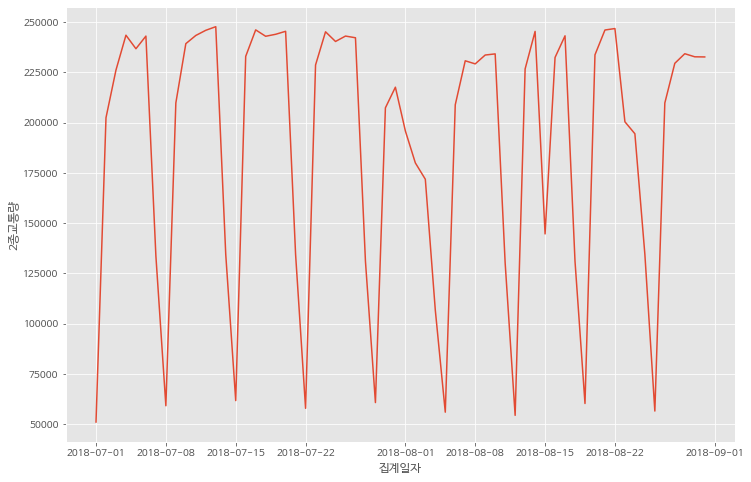

In [72]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_mart_total[((data_mart_total.day_of_week=='MON')
                                    |(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))
                                    &((data_mart_total.year==2018)&((data_mart_total.month==7)|(data_mart_total.month==8)))], x='집계일자', y='2종교통량')

<AxesSubplot:xlabel='집계일자', ylabel='2종교통량'>

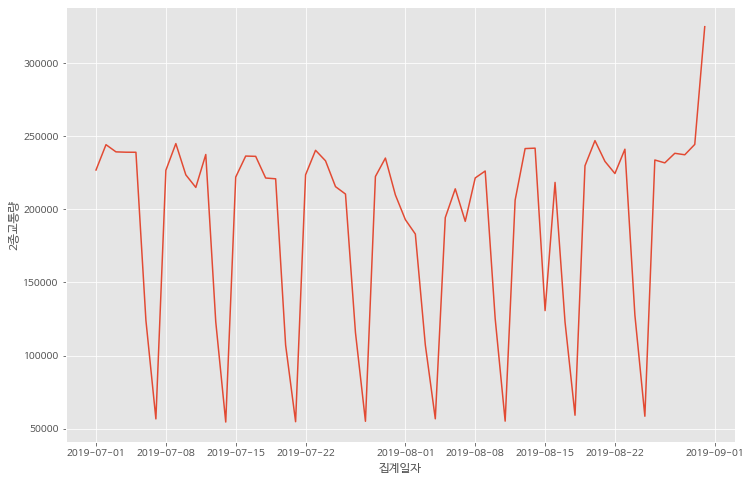

In [73]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_mart_total[((data_mart_total.day_of_week=='MON')
                                    |(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))
                                    &((data_mart_total.year==2019)&((data_mart_total.month==7)|(data_mart_total.month==8)))], x='집계일자', y='2종교통량')

<AxesSubplot:xlabel='집계일자', ylabel='2종교통량'>

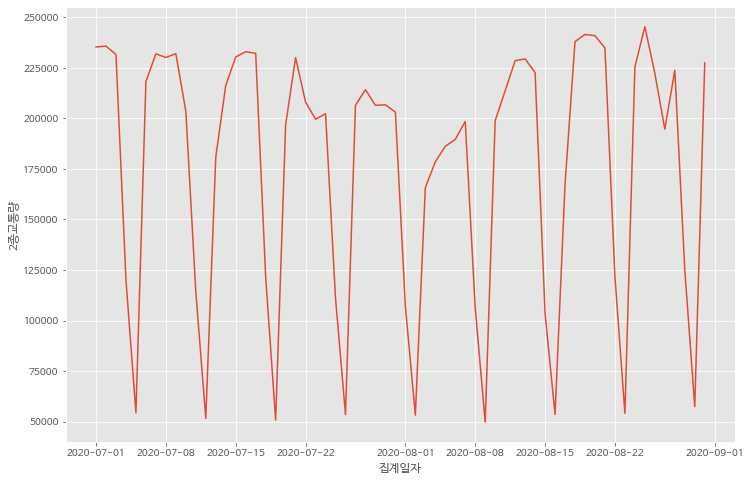

In [74]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_mart_total[((data_mart_total.day_of_week=='MON')
                                    |(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))
                                    &((data_mart_total.year==2020)&((data_mart_total.month==7)|(data_mart_total.month==8)))], x='집계일자', y='2종교통량')

<AxesSubplot:xlabel='stateDt', ylabel='daily_decideCnt'>

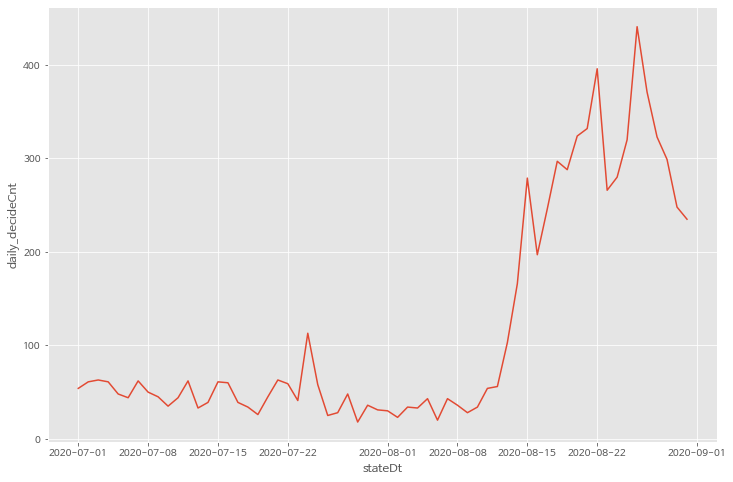

In [75]:
plt.figure(figsize=(12,8))

sns.lineplot(data=covid_data_2020_summer, x='stateDt', y='daily_decideCnt')